In [1]:
import json
import numpy as np

from IPython.display import display, Markdown, Latex
import pandas as pd
import os

In [37]:
def get_train_test(directory):
    directories = [x[0] for x in os.walk(f'{directory}')]
    test = []
    train = []
    _time = []
    for x in range(1, 6):
        for y in range(1, 4):
            with open(f'{directories[1]}/round_{x}/individual_{y}/test.txt', 'r') as f:
                aa = []
                for i in f.readlines():
                    aa.append(json.loads(i.replace('\n', '')))
            test.append(aa)
        with open(f'{directories[1]}/round_{x}/individual_1/train.txt', 'r') as f:
            tt = f.readlines()
            train.append(json.loads(tt[1].replace('\n', '')))
            _time.append(json.loads(tt[2].replace('\n', '')))
    return {'AUC PR': [x['AUC PR'] for y in test for x in y], 'AUC ROC':[x['AUC ROC'] for y in test for x in y], "CLL":[x['CLL'] for y in test for x in y]},  {'AUC PR': [[[y['m_auc_pr'] for y in x ] for x in train],[[y['s_auc_pr'] for y in x ] for x in train]], 'AUC ROC': [[[y['m_auc_roc'] for y in x ] for x in train], [[y['s_auc_roc'] for y in x ] for x in train]], 'CLL': [[[y['m_cll'] for y in x ] for x in train], [[y['s_cll'] for y in x ] for x in train]]},_time


In [59]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


def get_plot(data, metric, metric_name, name_fig):
    plt.tight_layout()
    fig, ax = plt.subplots()
    types = ['^-', '--', '-.', 'o', '+']
    for i in range(0, len(data[metric][0])):
        ax.errorbar(list(range(len(data[metric][0][i]))), data[metric][0][i], yerr=data[metric][1][i], fmt=types[i], linestyle=':', color='k', label=f'round_{i}')
        
    ax.set(xlabel='generations', ylabel=metric_name,
           title=f'{metric_name} over the generations')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%0.4f'))
    ax.grid(linestyle = ':')
    ax.legend(loc='lower right', fontsize='small', frameon=True)
    plt.savefig(name_fig, bbox_inches="tight")
    plt.show()

FOLD:  0


<Figure size 432x288 with 0 Axes>

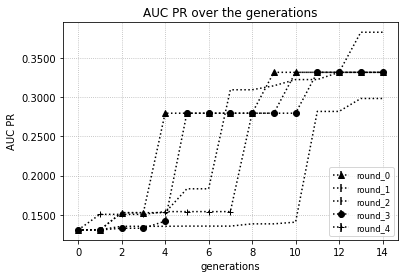

<Figure size 432x288 with 0 Axes>

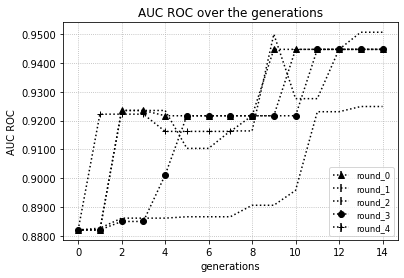

<Figure size 432x288 with 0 Axes>

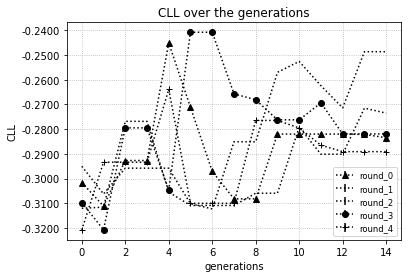

FOLD:  1


<Figure size 432x288 with 0 Axes>

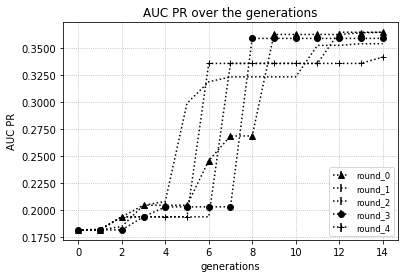

<Figure size 432x288 with 0 Axes>

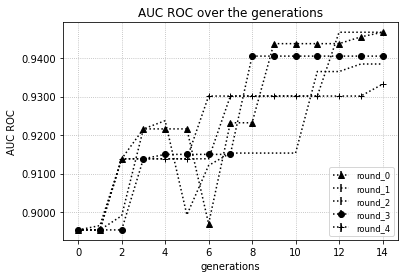

<Figure size 432x288 with 0 Axes>

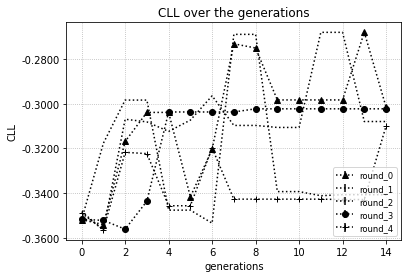

FOLD:  2


<Figure size 432x288 with 0 Axes>

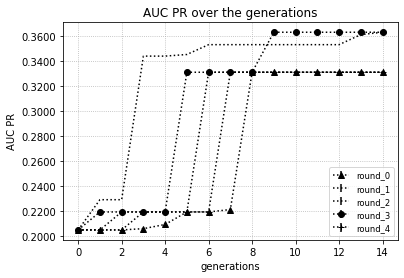

<Figure size 432x288 with 0 Axes>

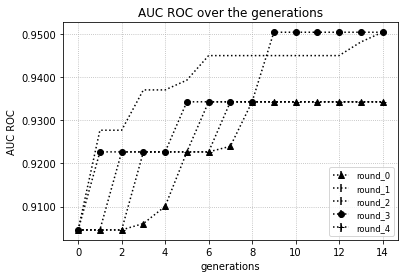

<Figure size 432x288 with 0 Axes>

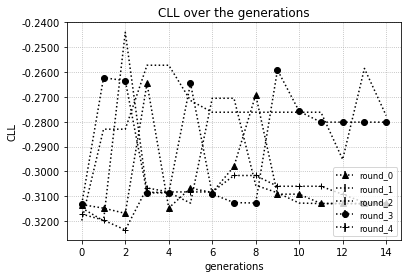

FOLD:  0


<Figure size 432x288 with 0 Axes>

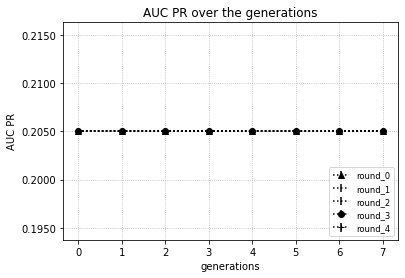

<Figure size 432x288 with 0 Axes>

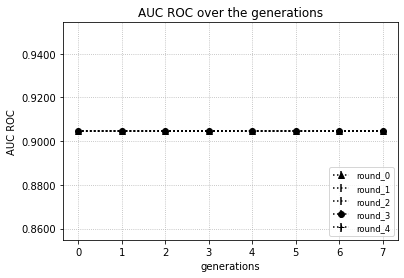

<Figure size 432x288 with 0 Axes>

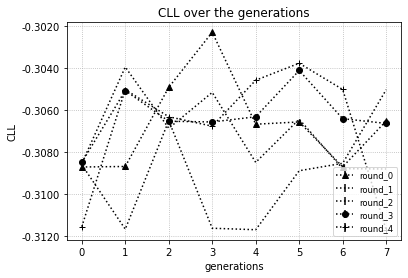

FOLD:  1


<Figure size 432x288 with 0 Axes>

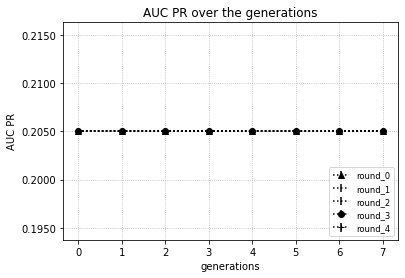

<Figure size 432x288 with 0 Axes>

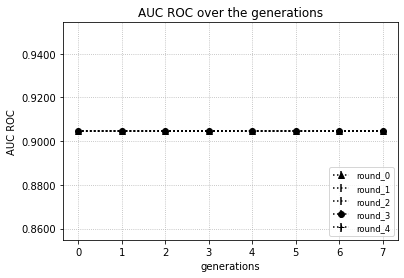

<Figure size 432x288 with 0 Axes>

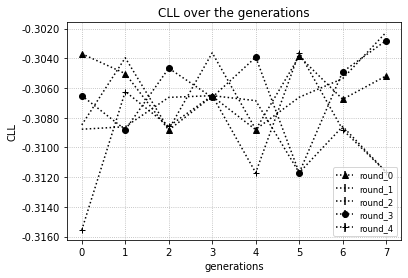

FOLD:  2


<Figure size 432x288 with 0 Axes>

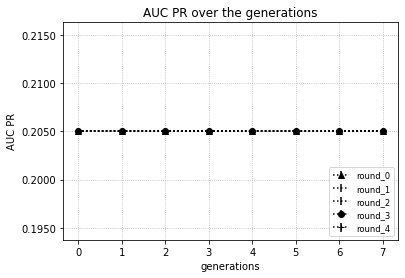

<Figure size 432x288 with 0 Axes>

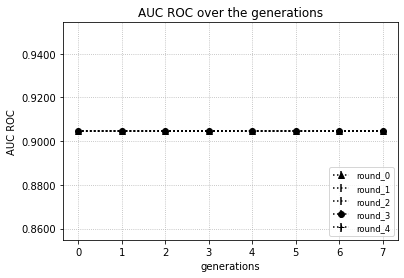

<Figure size 432x288 with 0 Axes>

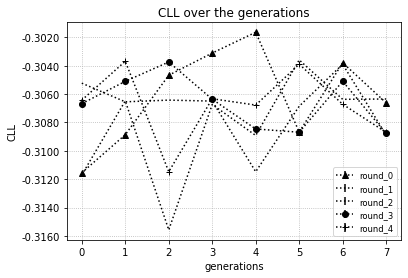

FOLD:  0


<Figure size 432x288 with 0 Axes>

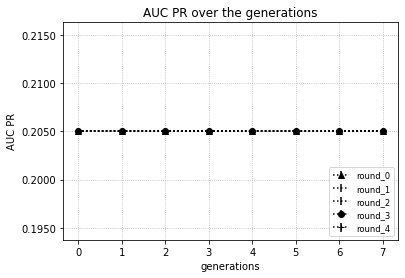

<Figure size 432x288 with 0 Axes>

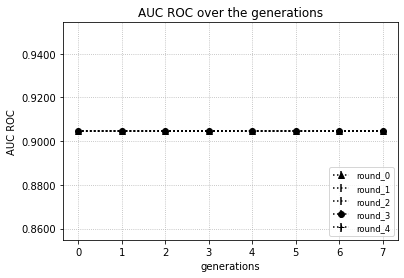

<Figure size 432x288 with 0 Axes>

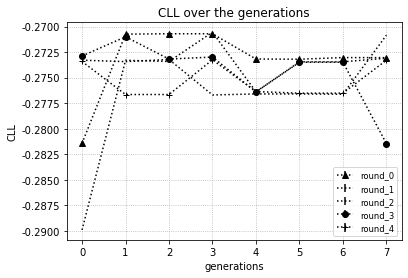

FOLD:  1


<Figure size 432x288 with 0 Axes>

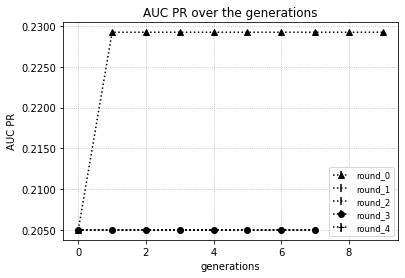

<Figure size 432x288 with 0 Axes>

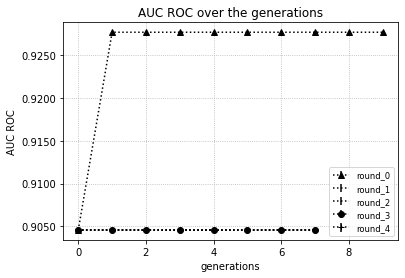

<Figure size 432x288 with 0 Axes>

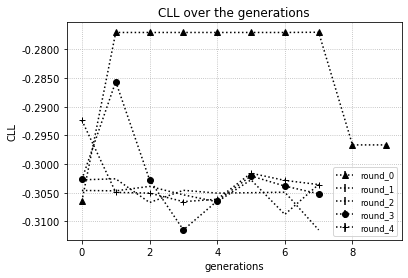

FOLD:  2


<Figure size 432x288 with 0 Axes>

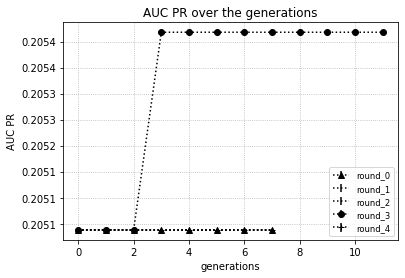

<Figure size 432x288 with 0 Axes>

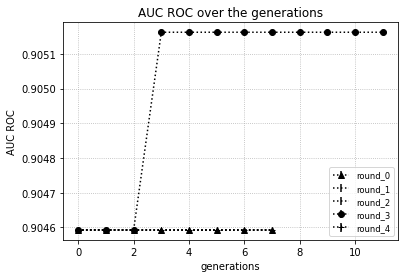

<Figure size 432x288 with 0 Axes>

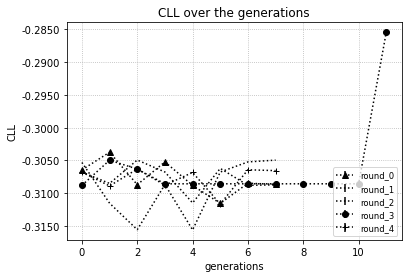

,Experiment,Fold,AUC PR,AUC ROC,CLL
0,imdb_uwcse_s_genetic,0,0.315 +/- 0.025,0.937 +/- 0.010,-0.260 +/- 0.021
1,imdb_uwcse_s_genetic,1,0.334 +/- 0.057,0.933 +/- 0.013,-0.307 +/- 0.010
2,imdb_uwcse_s_genetic,2,0.342 +/- 0.017,0.940 +/- 0.008,-0.269 +/- 0.011
3,imdb_uwcse_brkga,0,0.131 +/- 0.000,0.882 +/- 0.000,-0.295 +/- 0.010
4,imdb_uwcse_brkga,1,0.182 +/- 0.000,0.895 +/- 0.000,-0.320 +/- 0.012
5,imdb_uwcse_brkga,2,0.205 +/- 0.000,0.905 +/- 0.000,-0.275 +/- 0.008
6,imdb_uwcse_brkga_var,0,0.131 +/- 0.000,0.882 +/- 0.000,-0.295 +/- 0.009
7,imdb_uwcse_brkga_var,1,0.186 +/- 0.009,0.901 +/- 0.011,-0.314 +/- 0.013
8,imdb_uwcse_brkga_var,2,0.205 +/- 0.000,0.905 +/- 0.000,-0.275 +/- 0.013


In [60]:
types_genetic = ['s_genetic', 'brkga', 'brkga_var']
source = 'imdb'
target = 'uwcse'
pred_source = 'workedunder'
pred_target = 'advisedby'
table = []
table_train = []
metrics = ['AUC PR', 'AUC ROC', 'CLL']
for type_genetic in types_genetic:
    for fold_number in range(0, 3):
        print("FOLD: ", fold_number)
        directories = [x[0] for x in os.walk(f'groot_experiments/{source}_{target}_{pred_source}_{pred_target}/{type_genetic}/train_fold_{fold_number}')]
        test, train, _time = get_train_test(f'groot_experiments/{source}_{target}_{pred_source}_{pred_target}/{type_genetic}/train_fold_{fold_number}')

        try:
            os.mkdir(f'{directories[1]}/images/')
        except:
            pass
        for metric in metrics:
            get_plot(train, metric, metric, f'{directories[1]}/images/{metric}')
    

        table.append([f'imdb_uwcse_{type_genetic}',
                      f'{fold_number}',
                     '%.3f +/- %.3f' % (np.mean(test['AUC PR']), np.std(test['AUC PR'])),
                     '%.3f +/- %.3f' % (np.mean(test['AUC ROC']), np.std(test['AUC ROC'])),
                     '%.3f +/- %.3f' % (np.mean(test['CLL']), np.std(test['CLL']))])
    
display(pd.DataFrame(table, columns=['Experiment', 'Fold', 'AUC PR', 'AUC ROC', 'CLL']))